In [2]:
from groundedPL.codificacion import ToPropositionalLogic

parser = ToPropositionalLogic()
parser.debug = True

In [ ]:
### AQUÍ SU CÓDIGO
from groundedPL.logUtils import LogUtils
NUM_FILAS = 8
NUM_COLUMNAS = 8

#Regla 1: Cuando uan casilla no tiene una mina, tiene un numero.
def regla_1():
    casillas = [(x,y) for x in range(NUM_FILAS) for y in range(NUM_COLUMNAS)]
    nums = [i for i in range(9)]
    formulas = []
    formulas_otoria = []
    for casilla in casillas:
        for num in nums:
            formula = f'NUM({casilla[0]},{casilla[1]},{num})'
            formulas_otoria.append(parser.to_nltk(formula))
        otoria = LogUtils.Otoria(formulas_otoria)
        formula = f'-MINA({casilla[0]},{casilla[1]}) = {otoria}'
        formulas.append(parser.to_nltk(formula))
    return LogUtils.Ytoria(formulas)
        
#Regla 2: Una casilla debe contener un solo numero
def regla_2():
    casillas = [(x,y) for x in range(NUM_FILAS) for y in range(NUM_COLUMNAS)]
    nums = [i for i in range(9)]
    formulas_ytoria = []
    formulas = []
    for casilla in casillas:
        x = casilla[0]
        y = casilla[1]
        for n in nums:
            for m in nums:
                if n != m:
                    formula = f'NUM({x},{y},{m})'
                    formulas_ytoria.append(parser.to_nltk(formula))
            ytoria = LogUtils.Ytoria(formulas_ytoria)
        formula = f'NUM({x},{y},{n} -> {ytoria})'
        formulas.append(parser.to_nltk(formula))
    return LogUtils.Ytoria(formulas)

            
#Regla 3: El numero de una casilla coincide con la cantidad de sus vecinos que contengan una mina.
def regla_3():
    pass

#Regla 4: Si una casilla es una mina, debe estar tapada.
def regla_4():
    casillas = [(x,y) for x in range(NUM_FILAS) for y in range(NUM_COLUMNAS)]
    formulas = []
    for casilla in casillas:
        formula = f'MINA({casilla[0]},{casilla[1]}) -> TAPADA({casilla[0]}, {casilla[1]})'
        formulas.append(parser.to_nltk(formula))
    return LogUtils.Ytoria(formulas)

#Regla 5: Una casilla (x,y) puede ser una mina si y solo si es tapada.
def regla_5():
    pass

#Regla 6:  Si una casilla destapada (x,y) contiene al numero n, y se tienen n vecinos marcados inseleccionables 
#(es decir, se dedujo que tienen una mina), el resto de vecinos tapados no son minas.
def regla_6():
    pass

#Regla 7: Si una casilla destapada (x,y) contiene al numero n, y se tienen n vecinos tapados, entonces los vecinos tapados son minas.
def regla_7():
    pass

((-MINA(0,0) = (NUM(0,0,0) | NUM(0,0,1) | NUM(0,0,2) | NUM(0,0,3) | NUM(0,0,4) | NUM(0,0,5) | NUM(0,0,6) | NUM(0,0,7) | NUM(0,0,8))) & (-MINA(0,1) = (NUM(0,0,0) | NUM(0,0,1) | NUM(0,0,2) | NUM(0,0,3) | NUM(0,0,4) | NUM(0,0,5) | NUM(0,0,6) | NUM(0,0,7) | NUM(0,0,8) | NUM(0,1,0) | NUM(0,1,1) | NUM(0,1,2) | NUM(0,1,3) | NUM(0,1,4) | NUM(0,1,5) | NUM(0,1,6) | NUM(0,1,7) | NUM(0,1,8))) & (-MINA(0,2) = (NUM(0,0,0) | NUM(0,0,1) | NUM(0,0,2) | NUM(0,0,3) | NUM(0,0,4) | NUM(0,0,5) | NUM(0,0,6) | NUM(0,0,7) | NUM(0,0,8) | NUM(0,1,0) | NUM(0,1,1) | NUM(0,1,2) | NUM(0,1,3) | NUM(0,1,4) | NUM(0,1,5) | NUM(0,1,6) | NUM(0,1,7) | NUM(0,1,8) | NUM(0,2,0) | NUM(0,2,1) | NUM(0,2,2) | NUM(0,2,3) | NUM(0,2,4) | NUM(0,2,5) | NUM(0,2,6) | NUM(0,2,7) | NUM(0,2,8))) & (-MINA(0,3) = (NUM(0,0,0) | NUM(0,0,1) | NUM(0,0,2) | NUM(0,0,3) | NUM(0,0,4) | NUM(0,0,5) | NUM(0,0,6) | NUM(0,0,7) | NUM(0,0,8) | NUM(0,1,0) | NUM(0,1,1) | NUM(0,1,2) | NUM(0,1,3) | NUM(0,1,4) | NUM(0,1,5) | NUM(0,1,6) | NUM(0,1,7) | NUM(0,1,8)

In [11]:
### AQUÍ SU CÓDIGO
parser.debug = False
minas = [(2,1), (2,6), (3,1), (3,6), (7,1), (7,2), (7,7), (6,7), (5,7), (5,6), (5,5), (6,5), (7,5), (7,6)]

def vecinos(pos: tuple[int,int]):
    vecinos = [(x,y) for x in range(pos[0] - 1, pos[0] + 2) for y in range(pos[1] - 1, pos[1] + 2)]
    vecinos = [casilla for casilla in vecinos if casilla != pos and 0 <= casilla[0] < NUM_FILAS and 0 <= casilla[1] < NUM_COLUMNAS]
    return vecinos

tablero = []
for i in range(NUM_FILAS):
    fila = []
    for j in range(NUM_COLUMNAS):
        fila.append(0)
    tablero.append(fila)

I = dict()

for mina in minas:
    I[parser.parse(f'MINA({mina[0]},{mina[1]})')] = True
    I[parser.parse(f'TAPADA({mina[0]},{mina[1]})')] = True
    tablero[mina[1]][mina[0]] = '*'

    for vecino in vecinos(mina):
        if type(tablero[vecino[1]][vecino[0]]) == int:
            tablero[vecino[1]][vecino[0]] += 1


for x in range(NUM_FILAS):
    for y in range(NUM_COLUMNAS):
        if tablero[y][x] != '*':
            num = tablero[y][x]
            I[parser.parse(f'MINA({x},{y})')] = False
            I[parser.parse(f'NUM({x},{y},{num})')] = True

for fila in tablero:
    for casilla in fila:
        print(f'{str(casilla)}', end=', ')
    print('\n')

0, 1, 2, 2, 1, 0, 1, 1, 

0, 1, *, *, 1, 0, 2, *, 

0, 1, 2, 2, 1, 0, 2, *, 

0, 0, 0, 0, 0, 0, 1, 1, 

0, 0, 0, 0, 1, 2, 3, 2, 

0, 1, 2, 2, 3, *, *, *, 

0, 1, *, *, 4, *, 8, *, 

0, 1, 2, 2, 3, *, *, *, 



In [12]:
### AQUÍ SU CÓDIGO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def visualizar(I):
        # Inicializo el plano que contiene la figura
        fig, axes = plt.subplots()
        axes.get_xaxis().set_visible(False)
        axes.get_yaxis().set_visible(False)

        step = 1/NUM_FILAS
        tangulos = []
        font_size = step * 100
        colors = dict()
        colors[1] = (0,0,1)
        colors[2] = (0,0.5,0)
        colors[3] = (1,0,0)
        colors[4] = (0,0,0.5)
        colors[5] = (0.5,0,0)
        colors[6] = (0,0.5,0.5)
        colors[7] = (0,0,0)
        colors[8] = (0.5,0.5,0.5)

        # Creo los cuadrados claros en el tablero
        for atomo in I:
            if I[atomo]:
                # DECODIFICAMOS EL ÁTOMO PARA VISUALIZACIÓN
                predicado = parser.obtener_predicado(atomo)
                x, y, n = parser.obtener_argumentos(atomo)
                x = int(x)
                y = NUM_COLUMNAS - int(y) - 1
                n = int(n)
                if predicado == 'MINA':
                    tangulos.append(patches.Rectangle((step * x, step * y), step, step, facecolor='lightslategrey'))
                elif predicado == 'NUM' and n > 0:
                    plt.text(x * step + step / 2,
                             y * step + step / 2,
                             f'{n}',
                             fontsize=font_size,
                             color=colors[n])

        # Creo las líneas del tablero
        for j in range(8):
            locacion = j * step
            # Crea linea horizontal en el rectangulo
            tangulos.append(patches.Rectangle(*[(0, step + locacion), 1, 0.005],\
                    facecolor='black'))
            # Crea linea vertical en el rectangulo
            tangulos.append(patches.Rectangle(*[(step + locacion, 0), 0.005, 1],\
                    facecolor='black'))
        # Dibujo el tablero
        for t in tangulos:
            axes.add_patch(t)
        plt.show()

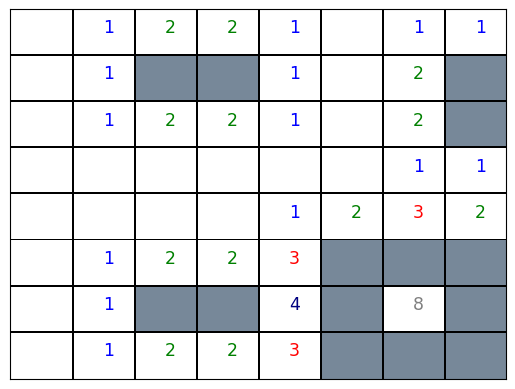

In [13]:
visualizar(I)